In [29]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [30]:
path = Path('../../data/results/experiment4')
#ab = pd.read_csv(path/'dC_01.csv')['b'].values

In [31]:
D = 30
nn_window = 5
nn_nf = 4
frequency = 100_000
#frequency = 1_000
max_times = 100
total_generations = max_times * frequency + 1000

In [32]:
# Fitness functions

#  static function
#def fitness_func(indiv, b, t): return (indiv.data**2).sum()

# experiment 3: dynamic fitness function (linear)
#def fitness_func(indiv, b, t): return ((indiv.data + 0.1*t)**2).sum()
# experiment 4: dynamic fitness function (x-sin(pi/2*t))^2
def fitness_func(indiv, b, t): return ((indiv.data-np.sin(np.pi/2*t))**2).sum()

# Constraints functions

# static or default
#def constraint_func(indiv, b, t): return -5 + sum((1/np.sqrt(D))*indiv.data)

# unconstrained
def constraint_func(indiv, b, t): return 0


# Experiment 1 and 2: Dynamic constraint
#def constraint_func(indiv, b, t): return -b[t] + sum((1/np.sqrt(D))*indiv.data)

In [33]:
population = Population.new_random(dimension=D)

opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                   max_times=max_times, frequency=frequency, callbacks=[OnChangeRestartPopulation])
opt.state_dict

{'gen': 0, 'evals': 0, 'time': 0, 'time_evals': 0, 'best': None}

Total time: 33:15


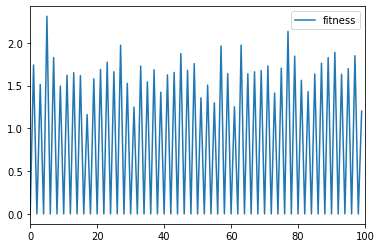

In [34]:
opt.run(total_generations, update_each=1)

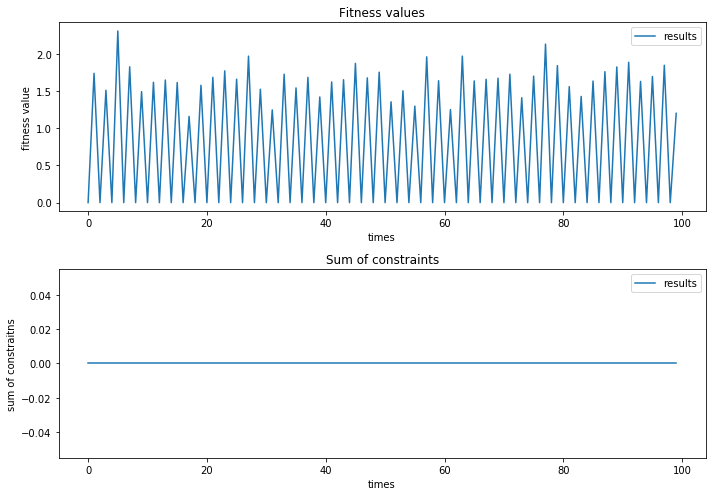

In [35]:
opt.recorder.plot();

In [36]:
df = pd.DataFrame({'fitness':opt.recorder.best_times_fitness, 'sum_constraints':opt.recorder.best_times_constraints})
df.head()

,fitness,sum_constraints
0,4.492806e-24,0
1,1.741444e+00,0
2,4.636458e-24,0
3,1.513296e+00,0
4,8.556527e-24,0


In [37]:
path.mkdir(parents=True, exist_ok=True)
df.to_csv(path/'best_known.csv', index=False)